# HW2
## İrem Şahin

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

## Parameters

In [2]:
eta = 0.01
epsilon = 1e-3


## Importing Data

In [3]:
# read data into memory
data_set = np.genfromtxt("hw02_data_set_images.csv", delimiter = ",")
labels = (np.genfromtxt("hw02_data_set_labels.csv", delimiter=",", dtype=str)).astype(str)


# get number of classes and number of samples
classes = np.unique(labels)
K = len(classes)
N = data_set.shape[0]

# turn the ABCDE into 01234 to use it easier
for i in range(N):
    result = np.argwhere(classes==labels[i])
    labels[i]=result[0][0]
labels= labels.astype(np.int)

# put first 25 points into training arrays and rest of the 14 points to test arrays
train=[]
test=[]
train_truth=[]
test_truth=[]
for i in range(K):
    for j in range(25):
        train.append(data_set[j+ 39*i])
        train_truth.append(labels[j+ 39*i])
    for k in range(14):
        test.append(data_set[14 +k+ 39*i])
        test_truth.append(labels[14 +k+ 39*i])
train=np.array(train)
test=np.array(test)
train_truth=np.array(train_truth)
test_truth=np.array(test_truth)


# one-hot encoding
Train_truth = np.zeros((len(train), K)).astype(int)
for i in range(len(train)):
    Train_truth[i][train_truth[i]]=1

## Define Functions

In [4]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul( w.T, X.T) + w0.T))))

In [5]:
# define the gradient functions
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat((y_truth[:,c] -y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

In [6]:
# randomly initalize w and w0
np.random.seed(421)
w = np.random.uniform(low = -0.01, high = 0.01, size = (train.shape[1],K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1,K))

In [7]:
# learn w and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    train_predicted = sigmoid(train, w, w0)
    objective_values = np.append(objective_values,0.5*np.sum((Train_truth-train_predicted.T)**2))
    
    w_old = w
    w0_old = w0

    w = w - eta * gradient_W(train, Train_truth, train_predicted.T)
    w0 = w0 - eta * gradient_w0(Train_truth, train_predicted.T)

    if np.sqrt(np.sum((w0 - w0_old)**2) + np.sum((w - w_old)**2)) < epsilon:
        break

    iteration = iteration + 1
    
#print(w, w0)
print(iteration)

1493


## Plot the convergence

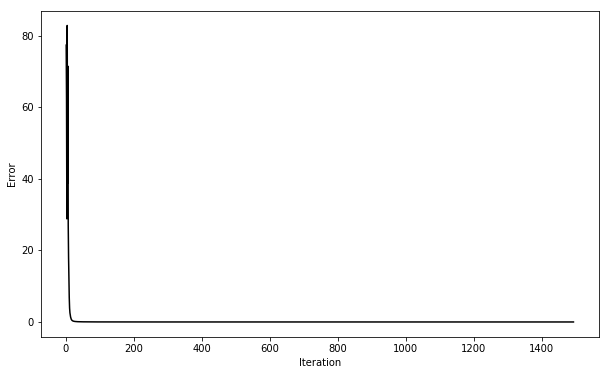

[[  9.99714169e-01   9.99975679e-01   9.99890771e-01   9.99813067e-01
    9.99995334e-01   9.99995803e-01   9.99860263e-01   9.99977566e-01
    9.99498342e-01   9.99827770e-01   9.99901087e-01   9.99996343e-01
    9.98591208e-01   9.99272505e-01   9.99923325e-01   9.98986974e-01
    9.99698567e-01   9.99431122e-01   9.98514890e-01   9.99393170e-01
    9.99495033e-01   9.99900800e-01   9.99624776e-01   9.99923719e-01
    9.99797390e-01   2.36956273e-06   4.83735415e-04   1.42872598e-05
    1.04217624e-03   3.09556734e-05   1.15648074e-06   7.93440299e-06
    5.38421238e-05   3.67042605e-04   5.65480379e-08   6.24163433e-06
    3.12283813e-07   3.02812510e-04   6.03339323e-08   3.19136018e-05
    5.77731296e-04   3.42466885e-07   5.89640050e-06   1.32929603e-04
    8.69101249e-04   2.69661870e-04   4.93661120e-04   1.85158127e-05
    6.30091350e-05   8.57716021e-05   1.98123456e-08   2.28173573e-09
    8.07037394e-06   3.93318703e-08   2.75339476e-07   5.01533478e-07
    1.10738486e-06  

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()
print(train_predicted)

## Training Performance

In [9]:
# calculate confusion matrix for training points
train_predicted = np.argmax(train_predicted, axis = 0) + 1
confusion_matrix = pd.crosstab(train_predicted, train_truth+1, rownames = ['train_pred'], colnames = ['train_truth'])
print(confusion_matrix)

train_truth   1   2   3   4   5
train_pred                     
1            25   0   0   0   0
2             0  25   0   0   0
3             0   0  25   0   0
4             0   0   0  25   0
5             0   0   0   0  25


In [10]:
# calculate confusion matrix for test points
test_predicted = sigmoid(test,w,w0)
test_predicted = np.argmax(test_predicted, axis = 0) + 1
confusion_matrix = pd.crosstab(test_predicted, test_truth+1, rownames = ['test_pred'], colnames = ['test_truth'])
print(confusion_matrix)

test_truth   1   2   3   4   5
test_pred                     
1           14   0   0   0   0
2            0  13   0   0   0
3            0   0  14   0   0
4            0   1   0  14   0
5            0   0   0   0  14
